# Course work: Intro to ML
## Objective: practice the preparation and modeling of data in order to predict the cancellation of hotel bookings
### Collaborative work by Giorgios, Pablo and Marius
### Data can be found at https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

## Step 1: importing libraries

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



C:\Users\mariu\AppData\Local\Temp\ipykernel_42764\563256088.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


## Inspection

In [3]:
# Displaying hidden columns
pd.set_option('display.max_columns', None) 

In [4]:
hotel= pd.read_csv("../data/hotel_bookings.csv")
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
hotel.shape

(119390, 32)

# Data Understanding

In [6]:
#Column names
print("Column Names:")
print(X.columns)

Column Names:


NameError: name 'X' is not defined

In [ ]:
#What each column holds, documented on kaggle: 
Schema_non_intuitive_columns = {
    "hotel": "There are only two hotel types: Resort Hotel or City Hotel",
    "is_canceled": "Value indicating if the booking was canceled (1) or not (0)",

    "lead_time": "Number of days that elapsed between the entering date of the booking into the PMS and the arrival date",
    "stays_in_weekend_nights": "Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel",
    "stays_in_week_nights": "Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel",
    
    "meal" : """Type of meal booked. Categories are presented in standard hospitality meal packages: 
        Undefined/SC – no meal package; 
        BB – Bed & Breakfast; 
        HB – Half board (breakfast and one other meal – usually dinner); 
        FB – Full board (breakfast, lunch and dinner)""",

    "country" : "Country of origin. Categories are represented in the ISO 3155–3:2013 format",
    "market_segment" : """Market segment designation. 
        “TA” means “Travel Agents” 
        “TO” means “Tour Operators”""",

    "distribution_channel" : """Booking distribution channel. 
        “TA” means “Travel Agents” 
        “TO” means “Tour Operators”""",

    "is_repeated_guest" : "Value indicating if the booking name was from a repeated guest (1) or not (0)",
    
    "previous_cancellations" : "Number of previous bookings that were cancelled by the customer prior to the current booking",
    "previous_bookings_not_canceled" : "Number of previous bookings not cancelled by the customer prior to the current booking",
    
    "reserved_room_type" : "Code of room type reserved.",
    "assigned_room_type" : "Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request.",
    "booking_changes" : "Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation",
    "deposit_type" : """"Indication on if the customer made a deposit to guarantee the booking. 
        This variable can assume three categories: 
        No Deposit – no deposit was made; 
        Non Refund – a deposit was made in the value of the total stay cost; 
        Refundable – a deposit was made with a value under the total cost of stay""",

    "agent" : "ID of the travel agency that made the booking",
    "company" : "ID of the company/entity that made the booking or responsible for paying the booking.",
    "days_in_waiting_list" : "Number of days the booking was in the waiting list before it was confirmed to the customer",
    
    "customer_type" : """Type of booking, assuming one of four categories: 
        Contract - when the booking has an allotment or other type of contract associated to it; 
        Group – when the booking is associated to a group; 
        Transient – when the booking is not part of a group or contract, and is not associated to other Transient parties
        Transient Party - ...""", 

    "Transient-party": "When the booking is transient, but is associated to at least other transient booking",
    
    "adr" : "Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights",
    
    "required_car_parking_spaces" : "Number of car parking spaces required by the customer",
    
    "total_of_special_requests" : "Number of special requests made by the customer (e.g. twin bed or high floor)",
    
    "reservation_status" : """Reservation last status, assuming one of three categories: 
        Canceled – booking was canceled by the customer; 
        Check-Out – customer has checked in but already departed; 
        No-Show – customer did not check-in and did inform the hotel of the reason why""",

    "reservation_status_date" : "Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel"


}



{'hotel': 'There are only two hotel types: Resort Hotel or City Hotel', 'lead_time': 'Number of days that elapsed between the entering date of the booking into the PMS and the arrival date', 'stays_in_weekend_nights': 'Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel', 'stays_in_week_nights': 'Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel', 'meal': 'Type of meal booked. Categories are presented in standard hospitality meal packages: \n        Undefined/SC – no meal package; \n        BB – Bed & Breakfast; \n        HB – Half board (breakfast and one other meal – usually dinner); \n        FB – Full board (breakfast, lunch and dinner)', 'country': 'Country of origin. Categories are represented in the ISO 3155–3:2013 format', 'market_segment': 'Market segment designation. \n        “TA” means “Travel Agents” \n        “TO” means “Tour Operators”', 'distribution_channel': 'Booking distribution channel.

## Describing the ambiguous columns, as documented on kaggle: 
- `hotel` : There are only two hotel types: Resort Hotel or City Hotel
- `is_canceled` : "Value indicating if the booking was canceled (1) or not (0)
- `lead_time`: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- `stays_in_weekend_nights`: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- `stays_in_week_nights`: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- `meal`: Type of meal booked. Categories are presented in standard hospitality meal packages: 
    - Undefined/SC – no meal package
    - BB – Bed & Breakfast
    - HB – Half board (breakfast and one other meal – usually dinner)
    - FB – Full board (breakfast, lunch and dinner)
- `country`: Country of origin. Categories are represented in the ISO 3155–3:2013 format
- `market_segment`: Market segment designation. 
    - “TA” means “Travel Agents”
    - “TO” means “Tour Operators”
- `distribution_channel`: Booking distribution channel. 
    - “TA” means “Travel Agents”
    - “TO” means “Tour Operators”
- `is_repeated_guest`: Value indicating if the booking name was from a repeated guest (1) or not (0)
- `previous_cancellations`: Number of previous bookings that were cancelled by the customer prior to the current booking
- `previous_bookings_not_canceled`: Number of previous bookings not cancelled by the customer prior to the current booking
- `reserved_room_type`: Code of room type reserved.
- `assigned_room_type`: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request.
- `booking_changes`: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- `deposit_type`: Indication on if the customer made a deposit to guarantee the booking. 
    - This variable can assume three categories: 
    - No Deposit – no deposit was made
    - Non Refund – a deposit was made in the value of the total stay cost
    - Refundable – a deposit was made with a value under the total cost of stay
- `agent`: ID of the travel agency that made the booking
- `company`: ID of the company/entity that made the booking or responsible for paying the booking.
- `days_in_waiting_list`: Number of days the booking was in the waiting list before it was confirmed to the customer
- `customer_type`: Type of booking, assuming one of four categories: 
    - Contract - when the booking has an allotment or other type of contract associated to it
    - Group – when the booking is associated to a group
    - Transient – when the booking is not part of a group or contract, and is not associated to other Transient parties
    - Transient Party - ...
- `Transient-party`: When the booking is transient, but is associated to at least other transient booking
- `adr`: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- `required_car_parking_spaces`: Number of car parking spaces required by the customer
- `total_of_special_requests`: Number of special requests made by the customer (e.g. twin bed or high floor)
- `reservation_status`: Reservation last status, assuming one of three categories: 
    - Canceled – booking was canceled by the customer
    - Check-Out – customer has checked in but already departed
    - No-Show – customer did not check-in and did inform the hotel of the reason why
- `reservation_status_date`: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

### The bookings are made in one of two ways
### The cancelation label comes at this point in the journey
### ...

### Questions

`assigned_room_type` - when were they assigned this: prior to visit, at visit. Does it come before cancellation ? Is this data present for cancelled guests ?

how smart would it be to focus our attention only on one hotel type ? `City_hotel` having a 66% share of the date...

transient ? meaning

customer type ? meaining

`assigned_as_reserved` - do we have the information to make the call about upgrade or downgrade ?


### Candidates for feature engineering:

`previous_cancellations` and `previous_bookings_not_canceled` as a ratio ? 

`babies` and `children` encoded as true or false for `with_young_ones`

`reserved_room_type` vs `assigned_room_type` encoded as `assigned_as_reserved` - 0:not, 1:yes, 2:upgrade (but do we have this information about how Ordinal these classes are ? order and hierarchy)

Canceled date (computed from `Reservation_status` = canceled filtered, then looking at `Reservation_status_date`) could be converted in lead time absolute value difference, or lead time into a date. this way can have a new variable: canceled how much ahead of time.

### Other relevant columns:

`is_cancelled`

`deposit_type`

`is_repeated_guest`

`booking_changes` - booking # of changes

`days_in_waiting_list`



### Need to reshape/ convert

all that have categorical values


### Visualize and inspect
### At least a few correlation analyses:

`reservation_status` - to be paired with `is_canceled` for better understanding of the label

`reservation_status_date` - is key too. when canceled, how compares to changes made on behalf of hotel: like room assigned


### Hypotheses for some T-tests ??? 

...


### Alg selection:


Regression with very few independent variables


K-Means requires scaling for best results


Decision tree uses thresholds, so does not consider as continous the ones that are categorical encoded

    depth and over fitting


Naive Bays ?



# Exploratory Data Analysis(EDA)

In [ ]:
print("\nData Types:")
print(X.dtypes)


Data Types:


NameError: name 'X' is not defined

In [ ]:
#Checking the missing values
print("\nMissing Values:")
print(X.isnull().sum())


Missing Values:
hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_sp

We can therefore conclude that the data is clean and does not present significant missing values (defined as)

We therefore continue to encoding, scaling and reformatting the data - ready for modeling.

In [ ]:
# Define numerical features
X_numerical = X.select_dtypes(include=['float64','int64'])
X_numerical

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,86.693382,0,0.00,0,0
1,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,86.693382,0,0.00,0,0
2,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,86.693382,0,75.00,0,0
3,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.000000,0,75.00,0,0
4,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.000000,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.000000,0,96.14,0,0
119386,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.000000,0,225.43,0,2
119387,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.000000,0,157.71,0,4
119388,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.000000,0,104.40,0,0


In [ ]:
# Define Categorical features
X_categorical = X.select_dtypes(include=['object'])
X_categorical

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out


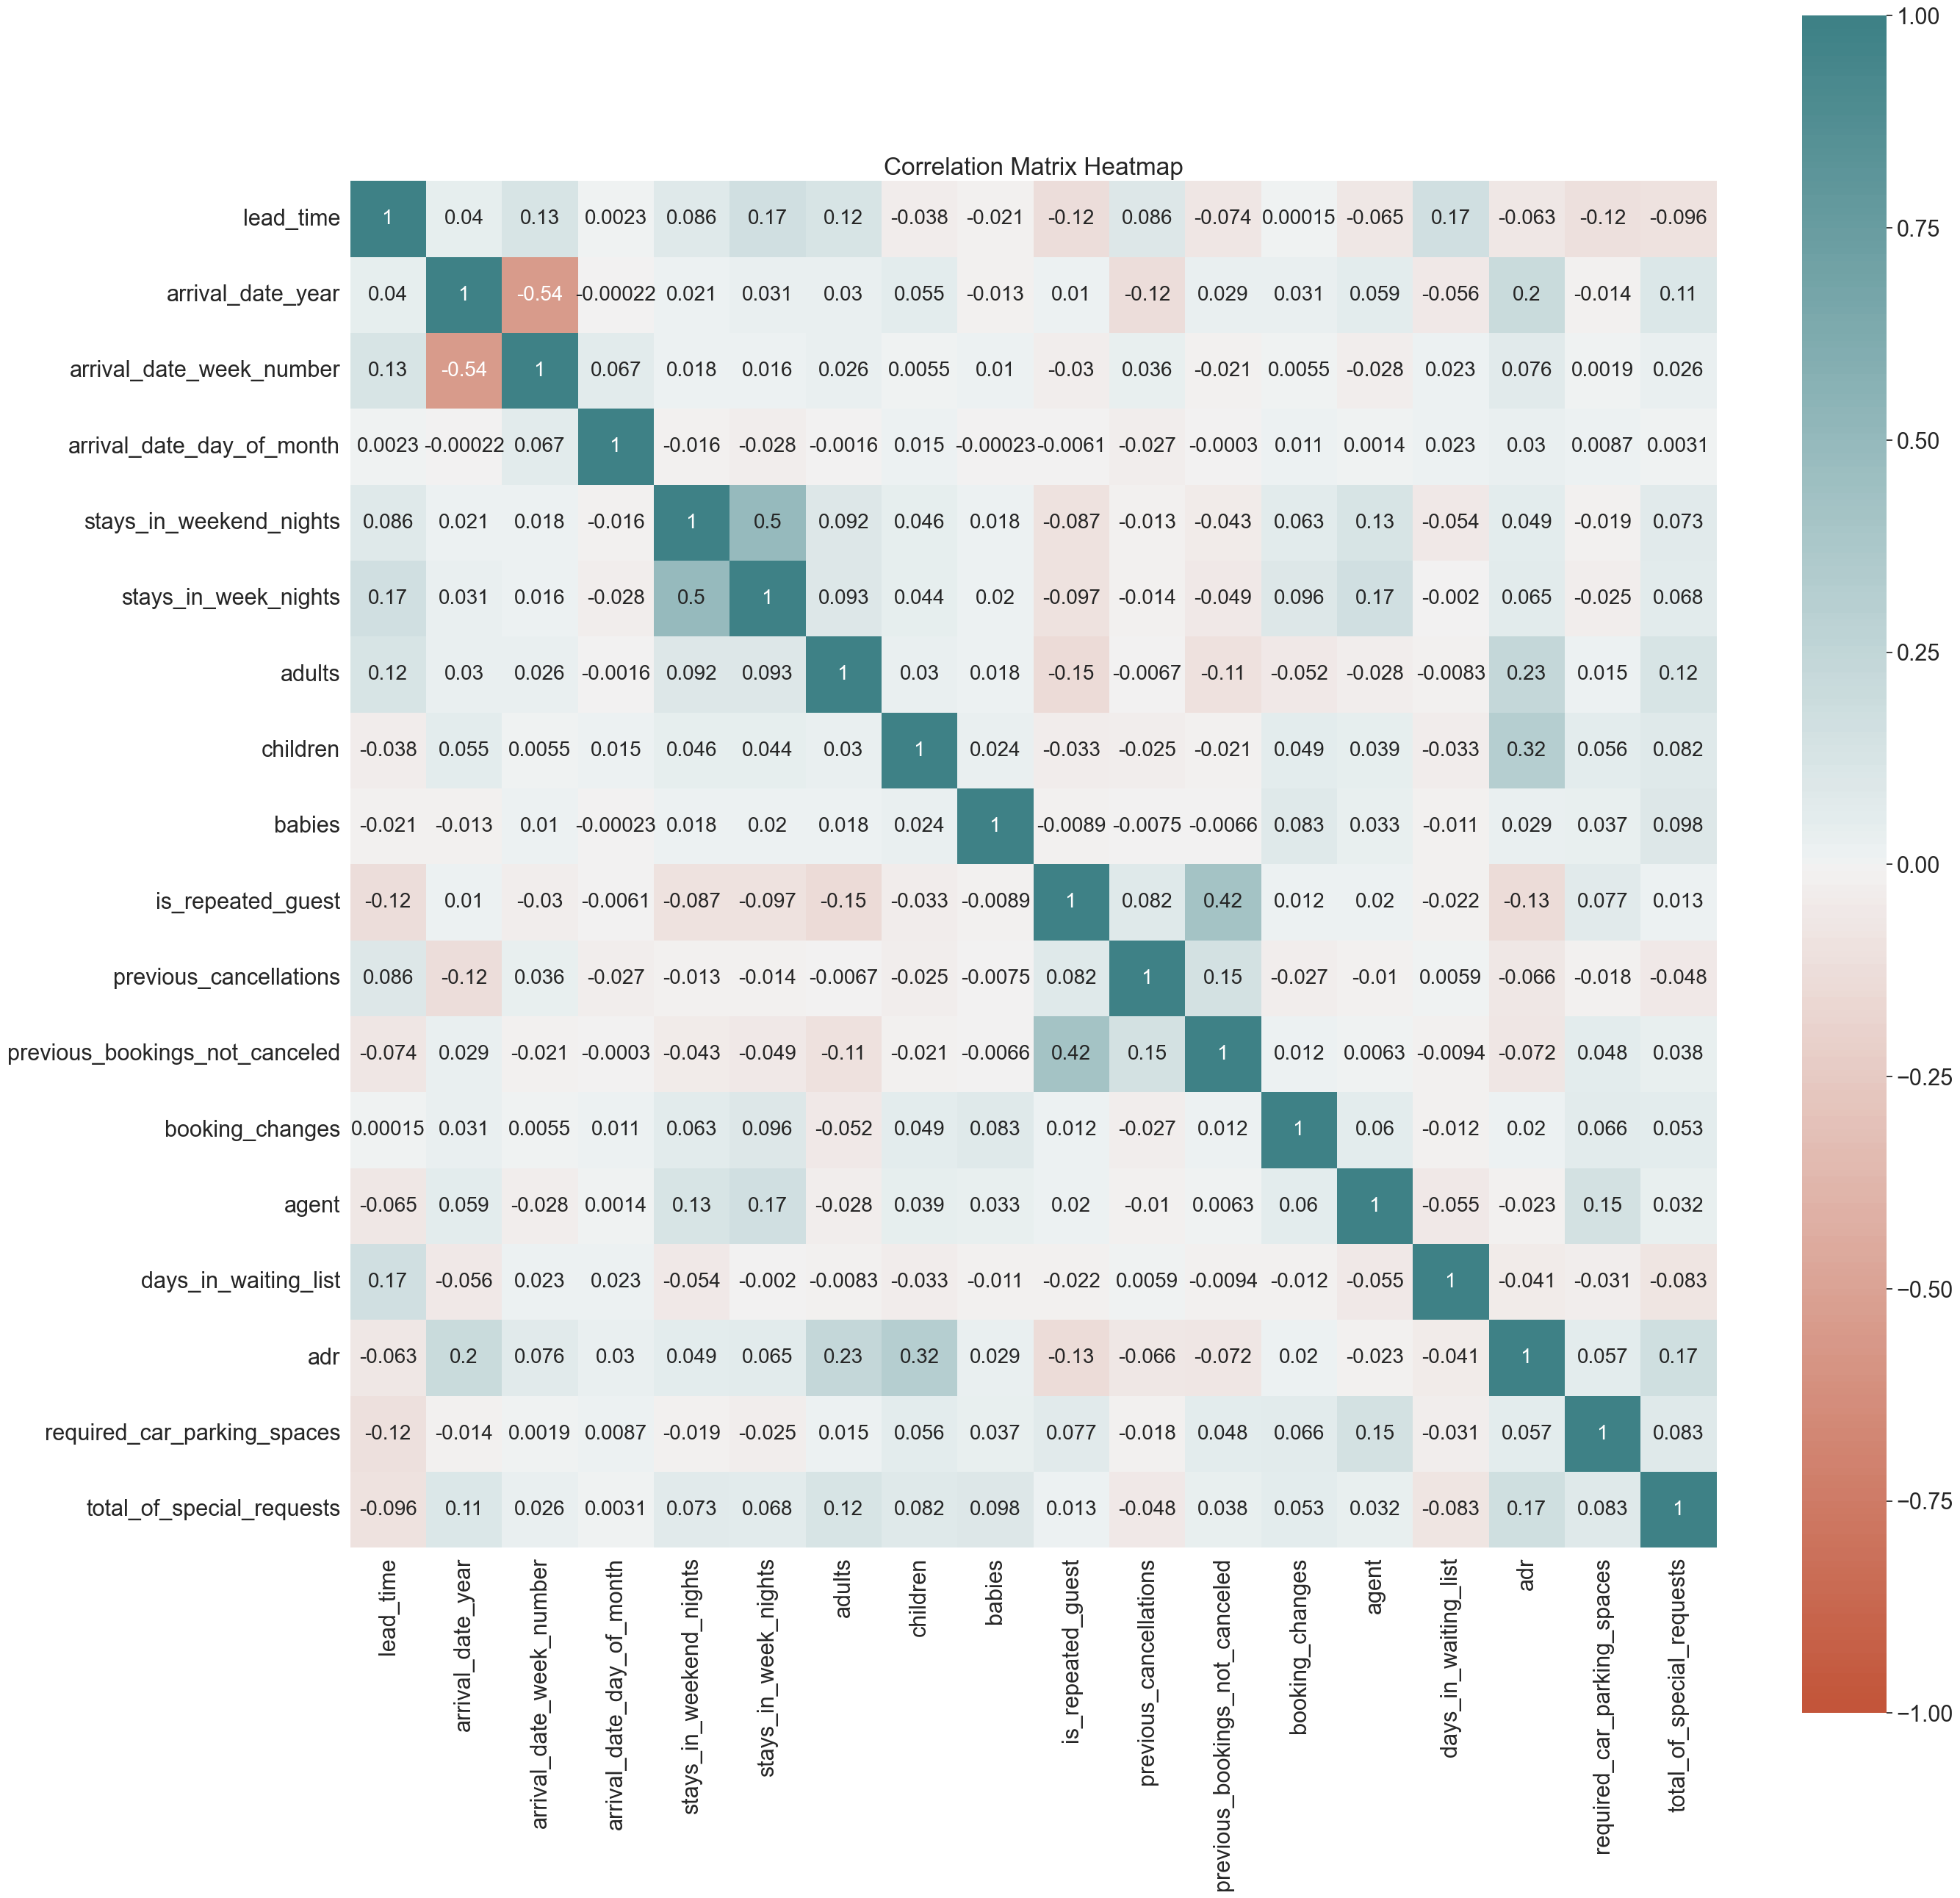

In [ ]:
# Plot correlation matrix
cormat = X_numerical.corr()

plt.figure(figsize=(30, 30))
sns.set(font_scale=2.0)
ax = sns.heatmap(
    cormat,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=True, annot=True, annot_kws={'size': 20}
)
plt.title('Correlation Matrix Heatmap', fontsize=24)
plt.show()

As we can observe there is no high correlation among features so will leave it as it is

In [ ]:
#Count the classes
#Count the frequency of values corresponding to different categories
class_counts = y.value_counts()

# Display the count of each class
print("Class Counts:")
print(class_counts)


Class Counts:
is_canceled
0    75166
1    44224
Name: count, dtype: int64


In [ ]:
# copy hotel dataframe into a new one that will be modified
hotel_eng = pd.DataFrame()
hotel_eng = hotel.copy()

In [38]:

# compute previous cancellation ratio
hotel_eng['previous_cancellation_ratio'] = np.nan_to_num((hotel_eng['previous_cancellations'] / (hotel_eng['previous_bookings_not_canceled'] + hotel_eng['previous_cancellations'])), nan=0)
hotel_eng['previous_cancellation_ratio'][0:10]


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: previous_cancellation_ratio, dtype: float64

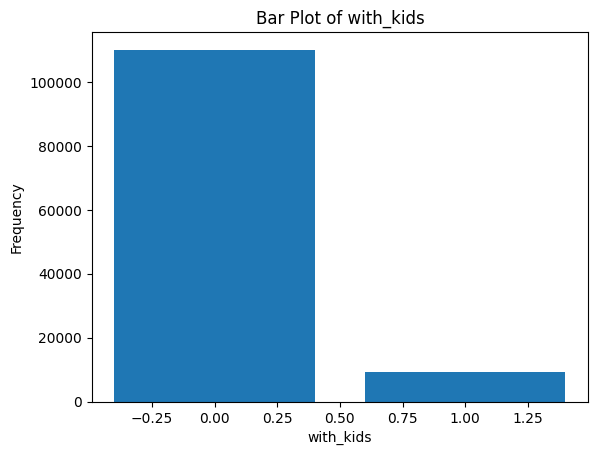

In [39]:
# compute with kids or not - Note: some data lost here indeed, doing as experiment
hotel_eng['with_kids'] = hotel_eng['children'].astype(bool) | hotel_eng['babies'].astype(bool)

# Testing for sanity
plt.bar(hotel_eng['with_kids'].unique(), hotel_eng['with_kids'].value_counts())
plt.xlabel('with_kids')
plt.ylabel('Frequency')
plt.title('Bar Plot of with_kids')
plt.show()

# Feature engineering & dataset split